In [1]:
import random 
import numpy as np
import matplotlib.pyplot as plt
from mpmath import linspace


first line and then column

In [2]:
#boudary conditions
def bc_periodic(i, j,  n): 
    return i%n, j%n

def bc_helical(i, j, n):
    if j>=n:
        new_i = (i-1)%n
        new_j = j%n
    elif j<0:
        new_i = (i+1)%n
        new_j = j%n
    else: 
        new_i = i%n
        new_j = j    
    return new_i, new_j

In [3]:
def test_bc_helical():#this is only for testing the function on a matrix of 3x3
    test_cases = [
        (1, 1, (1, 1)),  # Test case 1
        (4, 4, (0, 1)),# Test case 2
        (3,2, (0, 2)), # Test case 3
        (2,4, (1,1)),
        (3,2, (0,2)),
        (-1,0, (2,0)),
        (2,-1, (0,2)),
        
    ]
    
    for i, (input_i, input_j, expected) in enumerate(test_cases):
        result = bc_helical(input_i, input_j, n=3)
        assert result == expected, f"Test case {i+1} failed: expected {expected}, got {result}"
        print(f"Test case {i+1} passed")

# Run the tests
test_bc_helical()

Test case 1 passed
Test case 2 passed
Test case 3 passed
Test case 4 passed
Test case 5 passed
Test case 6 passed
Test case 7 passed


Now Calculate the energy of the system

In [4]:
# Step 1: Generate a random configuration of N^2 spins

def generate_random_configuration(n):
    return [[random.choice([-1, 1]) for _ in range(n)] for _ in range(n)]

# Step 2: Calculate the energy of the configuration
def calculate_energy(matrix, n):
    E = 0
    J = 1
    for i in range(n):
        for j in range(n):
            ni1, nj1 = bc_periodic(i + 1, j, n)
            #ni2, nj2 = bc_helical(i - 1, j ,n)
            ni3, nj3 = bc_periodic(i, j + 1, n)
            #ni4, nj4 = bc_helical(i, j - 1, n)
            energy_i = -J * matrix[i][j] * (
                matrix[ni1][nj1] +
                #matrix[ni2][nj2] +
                matrix[ni3][nj3]
                #matrix[ni4][nj4]
            )
            
            E += energy_i
    return E


100000


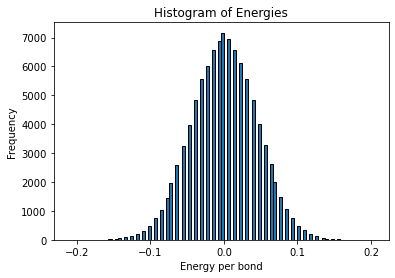

In [11]:
n= 16
k = 100000
matrix = generate_random_configuration(n)
configuration = generate_random_configuration(n)
E = calculate_energy(configuration, n)
energies = []
E0 = -2 * (n * n)
for _ in range(k):
    configuration = generate_random_configuration(n)
    E = calculate_energy(configuration, n)
    e = E / (2 * n * n)
    energies.append(e)
    
print(len(energies))   
plt.hist(energies, bins=100, edgecolor='black')
plt.xlabel('Energy per bond')
plt.ylabel('Frequency')
plt.title('Histogram of Energies')
plt.show()

Boltzmann sampling with hit-and-miss method

percentage of hits:  0.0


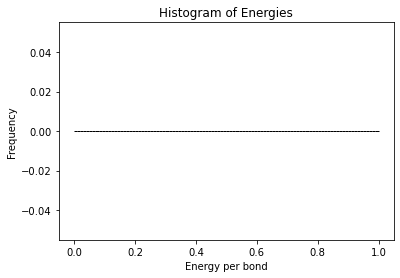

In [9]:
T = 10
beta = 1/T
n = 16
k = 100000

energies = []
for _ in range(k):
    configuration = generate_random_configuration(n)
    E = calculate_energy(configuration, n)
    E0 = -2 * (n * n)
    random_number = random.uniform(0, 1)
    if random_number <= np.exp(-beta * (E-E0)):
        e = E / (2 * n * n)
        energies.append(e)

print("percentage of hits: ", len(energies)/k)   
plt.hist(energies, bins=100, edgecolor='black')
plt.xlabel('Energy per bond')
plt.ylabel('Frequency')
plt.title('Histogram of Energies')
plt.show()



Reweighting technique 

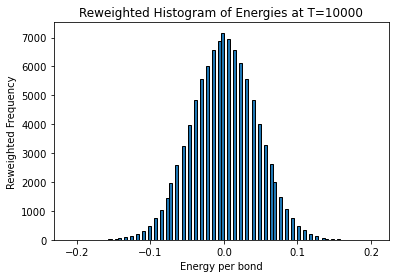

mean of the reweighted histogram:  0.00013160125054622338
peak of the reweighted histogram:  0.20312087406534166


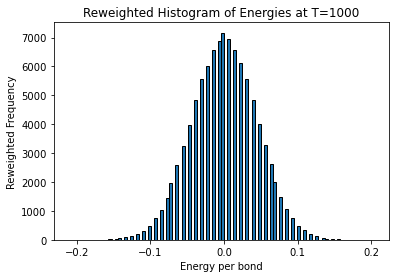

mean of the reweighted histogram:  0.0001298406301820393
peak of the reweighted histogram:  0.20308374442453622


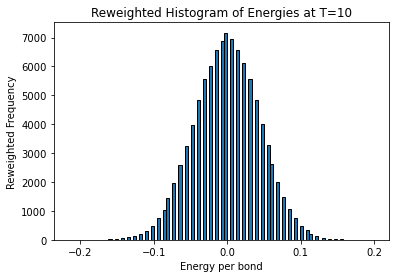

mean of the reweighted histogram:  -6.383260364588905e-05
peak of the reweighted histogram:  0.1990406455938926


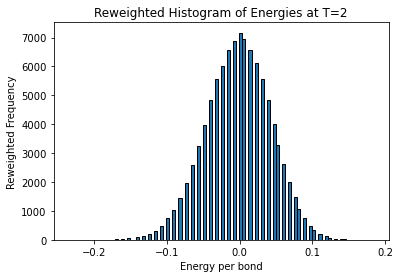

mean of the reweighted histogram:  -0.0008466447816286608
peak of the reweighted histogram:  0.18350814493640824


In [12]:
#from the histogram generated by the uniform sampling we can generate for a given temperature T PT(E)= exp(-E/T)PT(E) plot for T=10000 and T=2 and T=10

# Assuming `energies` is the array of total energies generated by the uniform sampling
energies = np.array(energies)

# Define the temperatures
temperatures = [10000,1000, 10, 2]

# Loop through each temperature and plot the reweighted histogram
for T in temperatures:
    weights = np.exp(-energies / T) * energies
    plt.hist(weights, bins=100, edgecolor='black')
    plt.xlabel('Energy per bond')
    plt.ylabel('Reweighted Frequency')
    plt.title(f'Reweighted Histogram of Energies at T={T}')
    plt.show()
    #print the mean of the reweighted histogram and the value at the peak of the function
    print("mean of the reweighted histogram: ", np.mean(weights))
    print("peak of the reweighted histogram: ", np.max(weights))